In [1]:
import time
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

from qubovert.sim import anneal_qubo
from qubovert import boolean_var

import random
from dwave.cloud import Client

#eth email:
#TOKEN = 'DEV-0d65e0f7a19d10d5c0d2fd33c1c88ea7107669a1'
#gmail:
TOKEN = 'DEV-8106d9f8d3de6f69c939f8a459aa10c40eaa70c3'

from scipy import linalg
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso

from dwave.cloud import config

from dwave.system import DWaveSampler, EmbeddingComposite

import networkx as nx
from minorminer import find_embedding

In [2]:
client = Client.from_config(token=TOKEN)
print(client)

#BQMSolver(id='hybrid_binary_quadratic_model_version2')
#StructuredSolver(id='DW_2000Q_6')

print(client.get_solvers())

solver = client.get_solver(name='hybrid_binary_quadratic_model_version2')

print(solver)

Q = {(0,0):-2,(0,1):2,(0,2):3}
#Q = {(0, 0): -1, (0, 1): 0, (1, 0): 2, (1, 1): -1}

computation = solver.sample_qubo(Q,num_reads=5,time_limit=3)
#computation = solver.sample_ising(linear={0:0,1:0,2:0},quadratic=Q,time_limit=3)

[StructuredSolver(id='DW_2000Q_6'), BQMSolver(id='hybrid_binary_quadratic_model_version2'), DQMSolver(id='hybrid_discrete_quadratic_model_version1'), CQMSolver(id='hybrid_constrained_quadratic_model_version1'), StructuredSolver(id='Advantage_system6.1'), StructuredSolver(id='Advantage2_prototype1.1'), StructuredSolver(id='Advantage_system4.1')]
BQMSolver(id='hybrid_binary_quadratic_model_version2')


In [4]:
type(solver)

dwave.cloud.solver.BQMSolver

In [7]:
client.get_solver()

StructuredSolver(id='DW_2000Q_6')

In [9]:
config.load_config()    

{'token': 'DEV-8106d9f8d3de6f69c939f8a459aa10c40eaa70c3'}

In [10]:
config.get_configfile_paths()   

['/home/hchoong/.config/dwave/dwave.conf']

In [51]:
print(computation.id)
print(computation.variables)
print("\n")
print(computation.result)
print(computation.timing)
print("\n")
print(computation.energies)
print(computation.samples)
print(computation.sampleset)

None


SolverFailureError: Unknown parameter num_reads

In [2]:
sampler_advantage = DWaveSampler(solver={'topology__type':'pegasus'})
ec_advantage = EmbeddingComposite(sampler_advantage)

In [3]:
sampler_advantage.properties

{'num_qubits': 5760,
 'qubits': [30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  1

In [5]:
sampler_advantage.properties['qubits'][-1]

5729

In [17]:
sampler_advantage.properties['chip_id']

'Advantage_system4.1'

In [18]:
sampler_advantage.properties['num_qubits']

5760

In [24]:
sampler_advantage.parameters

{'anneal_offsets': ['parameters'],
 'anneal_schedule': ['parameters'],
 'annealing_time': ['parameters'],
 'answer_mode': ['parameters'],
 'auto_scale': ['parameters'],
 'flux_biases': ['parameters'],
 'flux_drift_compensation': ['parameters'],
 'h_gain_schedule': ['parameters'],
 'initial_state': ['parameters'],
 'max_answers': ['parameters'],
 'num_reads': ['parameters'],
 'num_spin_reversal_transforms': ['parameters'],
 'programming_thermalization': ['parameters'],
 'readout_thermalization': ['parameters'],
 'reduce_intersample_correlation': ['parameters'],
 'reinitialize_state': ['parameters'],
 'warnings': [],
 'label': [],
 'chain_strength': [],
 'chain_break_method': [],
 'chain_break_fraction': [],
 'embedding_parameters': [],
 'return_embedding': []}

In [31]:
sampler_advantage.adjacency

{30: {31, 45, 2940, 2955, 2970, 2985},
 31: {30, 32, 46, 3120, 3135, 3150, 3165},
 32: {31, 33, 47, 3300, 3315, 3330, 3345},
 33: {32, 34, 48, 3480, 3495, 3510, 3525},
 34: {33, 35, 49, 3660, 3675, 3690, 3705},
 35: {34, 36, 50, 3840, 3855, 3870, 3885},
 36: {35, 37, 51, 4020, 4035, 4050, 4065},
 37: {36, 38, 52, 4200, 4215, 4230, 4245},
 38: {37, 39, 53, 4380, 4395, 4410, 4425},
 39: {38, 40, 54, 4560, 4575, 4590, 4605},
 40: {39, 41, 55, 4740, 4755, 4770, 4785},
 41: {40, 42, 56, 4920, 4935, 4950, 4965},
 42: {41, 43, 57, 5100, 5115, 5130, 5145},
 43: {42, 44, 58, 5280, 5295, 5310, 5325},
 44: {43, 59, 5460, 5475, 5490, 5505},
 45: {30, 46, 2940, 2955, 2970, 2985},
 46: {31, 45, 47, 3120, 3135, 3150, 3165},
 47: {32, 46, 48, 3300, 3315, 3330, 3345},
 48: {33, 47, 49, 3480, 3495, 3510, 3525},
 49: {34, 48, 50, 3660, 3675, 3690, 3705},
 50: {35, 49, 51, 3840, 3855, 3870, 3885},
 51: {36, 50, 52, 4020, 4035, 4050, 4065},
 52: {37, 51, 53, 4200, 4215, 4230, 4245},
 53: {38, 52, 54, 4380,

In [40]:
#Q = {(0,0):-2,(0,1):2,(0,2):3}
Q = {(0,0):-1,(0,1):2,(0,2):2,(1,1):-1,(1,2):2,(2,2):-1}
#Q = {(0, 0): -1, (0, 1): 0, (1, 0): 2, (1, 1): -1}

sampleset = ec_advantage.sample_qubo(Q,num_reads=100)

In [41]:
sampleset

SampleSet(rec.array([([0, 1, 0], -1., 26, 0.), ([0, 0, 1], -1., 38, 0.),
           ([1, 0, 0], -1., 36, 0.)],
          dtype=[('sample', 'i1', (3,)), ('energy', '<f8'), ('num_occurrences', '<i8'), ('chain_break_fraction', '<f8')]), Variables([0, 1, 2]), {'timing': {'qpu_sampling_time': 8002.0, 'qpu_anneal_time_per_sample': 20.0, 'qpu_readout_time_per_sample': 39.48, 'qpu_access_time': 23763.17, 'qpu_access_overhead_time': 789.83, 'qpu_programming_time': 15761.17, 'qpu_delay_time_per_sample': 20.54, 'total_post_processing_time': 277.0, 'post_processing_overhead_time': 277.0}, 'problem_id': 'abdcf90e-7a78-4bd1-ae3b-df2d6fe6bcfd'}, 'BINARY')

In [ ]:


computation = solver.sample_qubo(Q,num_reads=5,time_limit=3)

In [62]:
from dwave.system import LeapHybridSampler
Q = {('x1', 'x2'): 1, ('x1', 'z'): -2, ('x2', 'z'): -2, ('z', 'z'): 3}
sampleset = LeapHybridSampler().sample_qubo(Q, time_limit=6)

ValueError: API token not defined

In [71]:
m = {i: boolean_var('m(%d)' % i) for i in range(10)}

In [76]:
m[0]*m[1]

{('m(0)', 'm(1)'): 1}

In [3]:
def update_m(X,y,w,alpha):
    D = X.shape[1]

    m = {i: boolean_var('m(%d)' % i) for i in range(D)}

    A = np.linalg.multi_dot([np.diag(w),X.T,X,np.diag(w)])
    b = -2*np.linalg.multi_dot([np.diag(w),X.T,y])
    b = b + alpha*w*np.sign(w)

    model = 0
    for i in range(D):
        for j in range(D):
            model += m[i]*(A[i][j]+1e-9)*m[j]
        model += (b[i]+1e-9)*m[i]
        
    time_start = time.time()
    #res = anneal_qubo(model, num_anneals=10)
    res = anneal_qubo(model, num_anneals=1)
    model_solution = res.best.state
    
    m = np.array(list(model_solution.values()))
    return(m)


def update_m_dwave(X,y,w,alpha):
    TOKEN = 'DEV-0d65e0f7a19d10d5c0d2fd33c1c88ea7107669a1'
    client = Client.from_config(token=TOKEN)
    #print(client.get_solvers())
    solver = client.get_solver(name='hybrid_binary_quadratic_model_version2')
    
    D = X.shape[1]

    m = {i: boolean_var('m(%d)' % i) for i in range(D)}

    A = np.linalg.multi_dot([np.diag(w),X.T,X,np.diag(w)])
    b = -2*np.linalg.multi_dot([np.diag(w),X.T,y])
    b = b + alpha*w*np.sign(w)

    model = 0
    for i in range(D):
        for j in range(D):
            model += m[i]*(A[i][j]+1e-9)*m[j]
        model += (b[i]+1e-9)*m[i]
        
    time_start = time.time()
    #res = anneal_qubo(model, num_anneals=10)
    res = anneal_qubo(model, num_anneals=1)
    model_solution = res.best.state
    
    m = np.array(list(model_solution.values()))
    return(m)


def qubo_bsc(X,y,alpha,h_bar,hardware="classical"):
    #binary sparse coding
    #h_bar acts like planck's constant- determines strength of individual state

    D = X.shape[1]
    w = np.ones(D)*h_bar
    if hardware=="classical":
        m = update_m(X,y,w,alpha)
    elif hardware == "dwave":
        m = update_m_dwave(X,y,w,alpha)
    else:
        raise(Exception)

    return(m*w) 

In [17]:
#dataset = "diabetes"
dataset = "sparse_coding"

if dataset == "diabetes":
    #gamma=0.02
    gamma = 1.0
    X_all, y_all = datasets.load_diabetes(return_X_y=True)
    print(X_all.shape)

    X_train = X_all[:150]
    y_train = y_all[:150]

    X = X_all[:150]
    y = y_all[:150]
    
    X_val = X_all[150:]
    y_val = y_all[150:]

elif dataset == "sparse_coding":
    gamma = 1.0
    np.random.seed(42)

    N_train = 36
    N_val = 720
    N_test = 36
    N = N_train+N_val+N_test

    D = 100
    D_small = 10
    mu, sigma = 0, 1.0

    X_all = np.random.normal(mu, sigma, size=(N,D))
    X_small = np.random.normal(mu, sigma, size=(N,D_small))
    w_opt = np.abs(np.random.normal(mu,sigma,size=D_small))
    y_all = np.matmul(X_small,w_opt)

    X_all[:,:D_small] = X_small
    X_train = X_all[:N_train]
    X_val = X_all[N_train:N_train+N_val]
    X_test = X_all[N_train+N_val:]

    y_train = y_all[:N_train]
    y_val = y_all[N_train:N_train+N_val]
    y_test = y_all[N_train+N_val:]

    X = X_all[:N_train]
    y = y_all[:N_train]


N = X.shape[0]
D = X.shape[1]

X_mean = np.mean(X,axis=0)
X_std = np.std(X,axis=0)
y_mean = np.mean(y)
y_std = np.std(y)

X = (X-X_mean)/X_std
y = (y-y_mean)/y_std

########################################################################

0
alpha= 0.001000
w= [ 1.04307818e+00  1.13949085e+00  7.18462120e-01  1.26688380e+00
  2.39305447e-01  1.98205361e+00  1.30585932e+00  1.56683281e+00
  3.77098474e-01  1.39212324e+00  0.00000000e+00  0.00000000e+00
  7.08535850e-04  0.00000000e+00 -1.38641376e-03 -0.00000000e+00
  0.00000000e+00 -2.37446646e-04 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.28227954e-04  0.00000000e+00
  0.00000000e+00 -3.46650740e-03 -0.00000000e+00  3.83030064e-03
 -0.00000000e+00 -2.62969570e-04  0.00000000e+00  1.32365400e-03
  0.00000000e+00 -0.00000000e+00  7.01868041e-04  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -2.66799311e-04 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.21991414e-03 -3.35239990e-03
  0.00000000e+00 -0.00000000e+00 -5.68483587e-04  0.00000000e+00
 -7.05093944e-05  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.

conventional lasso finished
********************************************************************************************************************************




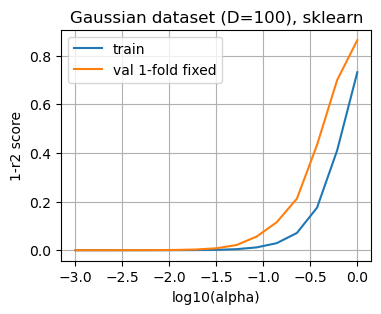

In [5]:
#algorithm:sklearn lasso

########################################################################
#gamma=0.02
#gamma = 1.0

########################################################################



#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-3, 0, 15)

scores_train = []
scores_val = []
plot_y = []

for i in range(len(alphas)):
    print(i)
    print("alpha= %f"%alphas[i])
    lasso = Lasso(alpha=alphas[i],fit_intercept=False,random_state=0, max_iter=10000)
    lasso.fit(X_train, y_train)
    

    
    #y_train_pred = np.matmul(X_train,lasso.coef_)+lasso.intercept_
    #y_val_pred = np.matmul(X_val,lasso.coef_)+lasso.intercept_
    y_train_pred = np.matmul(X_train,lasso.coef_)
    y_val_pred = np.matmul(X_val,lasso.coef_)

    r2_train = lasso.score(X_train,y_train)
    r2_val = lasso.score(X_val,y_val)

    SSres_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    SSres_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

    SStot_train = np.dot(y_mean-y_train,y_mean-y_train)
    SStot_val = np.dot(np.mean(y_val)-y_val,np.mean(y_val)-y_val)

    r2_train_calc = 1-SSres_train/SStot_train
    r2_val_calc = 1-SSres_val/SStot_val

    one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))

    #scores.append(r2_val)
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #scores_train.append(sqloss_train)
    #scores_val.append(sqloss_val)
    plot_y.append(zero_norm)
    
    print("w= %s"%(str(lasso.coef_)))
    print("r2_train= %f"%r2_train)
    print("r2_val= %f"%r2_val)
    print("r2_val_calc= %f"%r2_val_calc)
    print("sqloss_val= %f"%SSres_val)
    print("one_norm= %f"%one_norm)
    print("zero_norm= %f"%zero_norm)
    print("\n")

fig1 = plt.figure(figsize=(4,3))
ax1 = fig1.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
ax1.plot(np.log10(alphas),1-np.array(scores_train),label="train")
ax1.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
#ax1.plot(np.log10(alphas),plot_y)
ax1.set_title("Gaussian dataset (D=100), sklearn")
ax1.set_xlabel("log10(alpha)")
ax1.set_ylabel("1-r2 score")
#ax1.set_ylabel("|w|_0 zero norm")
ax1.grid()
ax1.legend()
fig1.savefig('lasso_f1.png')
#plt.show()

print("conventional lasso finished")
#lasso = None
print("*"*128)
print("\n")

########################################################################






0
alpha= 0.100000
m*w= [0.2 0.2 0.  0.  0.  0.2 0.2 0.2 0.2 0.2 0.  0.  0.  0.  0.  0.2 0.  0.
 0.  0.  0.2 0.2 0.  0.2 0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.2 0.  0.
 0.2 0.  0.  0.2 0.2 0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.2 0.2 0.2 0.  0.  0.2 0.2 0.  0.2 0.  0.2
 0.2 0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.2 0.  0.2 0.2 0.  0.2
 0.  0.  0.2 0.  0.  0.  0.  0.2 0.  0. ]
[-0.34906817  1.27148037 -5.51819752  2.47847278  1.61504492 -0.44562051
 -4.17880092  6.06704666  1.66903782  0.96293833  3.02934792  4.19851538
 -1.37060821  3.60190689  0.51171107 -1.08798446 -0.64562463  0.28824695
  0.69696916  4.23117977 -3.29043009 -0.03056281 -1.7133623  -2.51298373
 -1.87552883  4.01550161  4.22263879 -3.32237178 -1.74304271 -3.58556043
  6.22316771  2.02807619  3.76353139 -1.09095308  6.11366585  3.39098755]
r2_train= 0.916972
r2_val= -0.246135
sqloss_val= 13589.124920
one_norm= 6.400000
zero_norm= 32.000000


1
alpha= 0.143845
m*w= [0.2 0.

m*w= [0.2 0.2 0.  0.2 0.  0.2 0.2 0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.2 0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.2
 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.2 0.2 0.  0.  0.
 0.  0.  0.2 0.  0.  0.  0.  0.  0.  0. ]
[ 0.3765683   2.0028335  -6.08626945  2.79440225  0.36809745 -0.78450412
 -3.1160328   6.16120201  1.98150128  1.34627791  2.82062418  2.49194918
 -1.04224237  4.77432537 -0.31740816 -1.93532015  0.03660289 -1.05695923
 -1.14876658  3.39718896 -1.41252497  0.67004235 -1.86751823 -1.82483097
  0.40429152  2.01520952  2.33877218 -2.73606557 -1.16062528 -2.44204085
  6.27878162  3.24219666  3.33156341 -1.95311865  4.9425723   4.72799147]
r2_train= 0.876927
r2_val= 0.240867
sqloss_val= 8278.362890
one_norm= 3.000000
zero_norm= 15.000000


10
alpha= 3.792690
m*w= [0.2 0.2 0.  0.2 0.  0.2 0.

m*w= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
[0.76718797 0.76718797 0.76718797 0.76718797 0.76718797 0.76718797
 0.76718797 0.76718797 0.76718797 0.76718797 0.76718797 0.76718797
 0.76718797 0.76718797 0.76718797 0.76718797 0.76718797 0.76718797
 0.76718797 0.76718797 0.76718797 0.76718797 0.76718797 0.76718797
 0.76718797 0.76718797 0.76718797 0.76718797 0.76718797 0.76718797
 0.76718797 0.76718797 0.76718797 0.76718797 0.76718797 0.76718797]
r2_train= 0.000000
r2_val= -0.025184
sqloss_val= 11179.646143
one_norm= 0.000000
zero_norm= 0.000000


19
alpha= 100.000000
m*w= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0

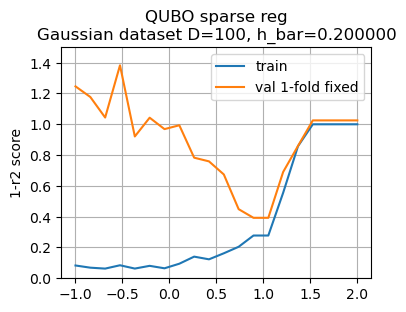

In [5]:
#algorithm: classical simulation qubo_bsc

h_bar = 0.2

n_alphas = 10
alphas = np.logspace(-1, 2, n_alphas)
#alphas = np.array([15.0])
#alphas = np.logspace(-3, 0, 15)

scores_train = []
scores_val = []
plot_y = np.zeros(n_alphas)

for i in range(len(alphas)):
    print(i)
    print("alpha= %f"%alphas[i])

    #mw = custom_algo(X,y,alphas[i],gamma)
    mw = qubo_bsc(X=X,y=y,alpha=alphas[i],h_bar=h_bar)
    
    #lasso = Lasso(alpha=alphas[i],fit_intercept=False,random_state=0, max_iter=10000)
    #lasso.fit(X, y)
    #mw = lasso.coef_
    
    y_train_pred = np.matmul(X,mw)*y_std+y_mean
    y_val_pred = np.matmul((X_val-X_mean)/X_std,mw)*y_std+y_mean
    SSres_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    SSres_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

    SStot_train = np.dot(y_mean-y_train,y_mean-y_train)
    SStot_val = np.dot(np.mean(y_val)-y_val,np.mean(y_val)-y_val)

    r2_train = 1-SSres_train/SStot_train
    r2_val = 1-SSres_val/SStot_val
    
    one_norm = np.matmul(np.abs(mw),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(mw)>0,1,0),np.ones(D))
    #print(zero_norm)
    
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #plot_y.append(zero_norm)
    plot_y[i] = zero_norm
    #print(plot_y)
    
    print("m*w= %s"%(str(mw)))
    print(y_train_pred)
    print("r2_train= %f"%r2_train)
    print("r2_val= %f"%r2_val)
    print("sqloss_val= %f"%SSres_val)
    print("one_norm= %f"%one_norm)
    print("zero_norm= %f"%zero_norm)
    print("\n")

fig2 = plt.figure(figsize=(4,3))
ax2 = fig2.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
ax2.plot(np.log10(alphas),1-np.array(scores_train),label="train")
ax2.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
#ax2.plot(np.log10(alphas),plot_y)
title_text = "QUBO sparse reg\nGaussian dataset D=100, h_bar=%f"%h_bar
ax2.set_title(title_text)
#ax2.set_xlabel("log10(alpha)")
ax2.set_ylabel("1-r2 score")
#ax2.set_ylabel("|w|_0 zero norm")
ax2.set_ylim(0.0,1.5)
ax2.grid()
ax2.legend()
fig2.savefig('lasso_f2.png')

In [63]:
[{} for i in range(5)]

[{}, {}, {}, {}, {}]

In [64]:
7%5

2

In [18]:
#algorithm: dwave hybrid

h_bar = 0.2

n_alphas = 1
alphas = np.logspace(-1, 2, n_alphas)

D = X.shape[1]
Q = {}

for i in range(len(alphas)):
    print(i)
    print("alpha= %f"%alphas[i])
    alpha = alphas[i]
    
    #embed to Q dict
    #hybrid solver: max_variables=1M, max_biases=20M (i.e. connections between variables)
    
    w = np.ones(D)*h_bar
    
    A = np.linalg.multi_dot([np.diag(w),X.T,X,np.diag(w)])
    b = -2*np.linalg.multi_dot([np.diag(w),X.T,y])
    b = b + alpha*w*np.sign(w)
    
    #Q = {(0,0):1,(0,1):2,(0,2):3}

    for j in range(0,D):
        Q[(i*D+j,i*D+j)] = A[j][j]+b[j]+1e-9
        for k in range(j+1,D):
            Q[(i*D+j,i*D+k)] = 2*A[j][k]+1e-9 #*2 because A is symmetric
                
            
            
    
    

0
alpha= 0.100000


In [19]:
Q

{(0, 0): -2.9812569040801895,
 (0, 1): -0.10348307099210048,
 (0, 2): -0.4231459594690128,
 (0, 3): -0.16938206612755485,
 (0, 4): 0.7716260946600424,
 (0, 5): 0.16460349726285056,
 (0, 6): 0.12577457080886306,
 (0, 7): -0.16073683573712527,
 (0, 8): -0.056807687182506506,
 (0, 9): 0.22992398799201888,
 (0, 10): -0.03149911489893282,
 (0, 11): -0.504696857571091,
 (0, 12): 0.2944449393195727,
 (0, 13): 1.0431545433133154,
 (0, 14): -0.3841397323908069,
 (0, 15): 0.5079617739213048,
 (0, 16): 0.14827455845407134,
 (0, 17): -0.33540982815411285,
 (0, 18): 0.3090936685036382,
 (0, 19): -0.31802145151636985,
 (0, 20): -0.14283004807169014,
 (0, 21): 0.4015935597893546,
 (0, 22): -0.3285885954594619,
 (0, 23): -0.08435216857086583,
 (0, 24): -0.47806549448857916,
 (0, 25): -0.7401949701425283,
 (0, 26): 0.47407895636758984,
 (0, 27): -0.08314558816634453,
 (0, 28): 0.3932305973656306,
 (0, 29): -0.669894869401172,
 (0, 30): 0.14021027132180477,
 (0, 31): -0.3154263400230614,
 (0, 32): 0.492

In [6]:
Q_vals = np.array(list(Q.values()))

In [7]:
np.max(Q_vals)

8.450702772430654

(array([3.000e+00, 7.000e+00, 8.200e+01, 3.611e+03, 1.305e+03, 2.000e+01,
        1.000e+01, 7.000e+00, 3.000e+00, 2.000e+00]),
 array([-5.10976527, -3.75371846, -2.39767166, -1.04162486,  0.31442195,
         1.67046875,  3.02651556,  4.38256236,  5.73860916,  7.09465597,
         8.45070277]),
 <BarContainer object of 10 artists>)

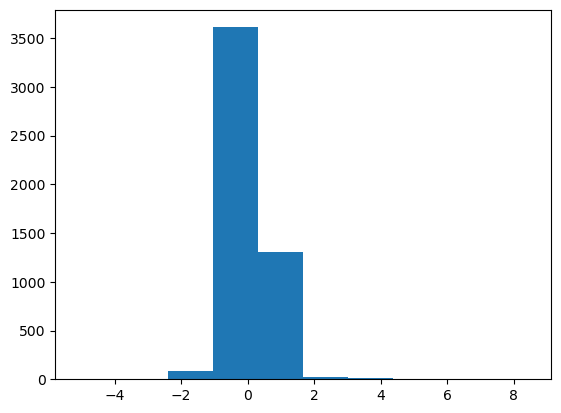

In [8]:
plt.hist(Q_vals)

In [103]:
np.linspace(0,0.9,10)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [104]:
np.quantile(np.abs(Q_vals),np.linspace(0,0.9,10))

array([1.08325225e-05, 6.21196298e-02, 1.25338821e-01, 1.91194856e-01,
       2.56218502e-01, 3.33505255e-01, 4.23217738e-01, 5.21660015e-01,
       6.41303481e-01, 8.25473583e-01])

In [9]:
len(Q)

5050

In [105]:
np.quantile(np.abs(Q_vals),0.9)

0.82547358346098

In [7]:
client = Client.from_config(token=TOKEN)
print(client)

#BQMSolver(id='hybrid_binary_quadratic_model_version2')
#StructuredSolver(id='DW_2000Q_6')

print(client.get_solvers())

#solver = client.get_solver(name='hybrid_binary_quadratic_model_version2')
solver = client.get_solver(name='Advantage_system4.1')


print(solver)


#computation = solver.sample_qubo(Q,time_limit=3)

[StructuredSolver(id='DW_2000Q_6'), BQMSolver(id='hybrid_binary_quadratic_model_version2'), DQMSolver(id='hybrid_discrete_quadratic_model_version1'), CQMSolver(id='hybrid_constrained_quadratic_model_version1'), StructuredSolver(id='Advantage_system6.1'), StructuredSolver(id='Advantage2_prototype1.1'), StructuredSolver(id='Advantage_system4.1')]
StructuredSolver(id='Advantage_system4.1')


In [8]:
solver.edges

{(1333, 5391),
 (2931, 1260),
 (4952, 460),
 (3166, 376),
 (2241, 4196),
 (3165, 151),
 (2676, 4124),
 (2048, 4555),
 (2972, 510),
 (3018, 855),
 (4408, 2467),
 (2047, 4330),
 (5275, 2052),
 (261, 4246),
 (2482, 4258),
 (1764, 1763),
 (4256, 2046),
 (2281, 3221),
 (2716, 3149),
 (109, 3825),
 (2559, 4663),
 (1499, 5437),
 (3304, 3319),
 (2412, 5367),
 (1927, 1942),
 (4929, 1765),
 (2365, 4797),
 (2653, 5429),
 (1337, 1322),
 (442, 443),
 (5442, 2323),
 (1586, 5032),
 (2949, 1815),
 (3208, 3207),
 (2213, 4376),
 (5441, 2098),
 (1585, 4807),
 (1831, 1830),
 (2020, 4735),
 (5248, 2457),
 (1392, 5166),
 (2990, 1035),
 (454, 453),
 (5722, 5723),
 (5721, 1334),
 (86, 5130),
 (5528, 1693),
 (1886, 1887),
 (320, 4021),
 (2384, 5547),
 (127, 4380),
 (4249, 4234),
 (2380, 2395),
 (2619, 4663),
 (126, 4155),
 (1898, 1897),
 (167, 3375),
 (3395, 1097),
 (4412, 4413),
 (413, 398),
 (4262, 682),
 (3202, 1456),
 (841, 3319),
 (409, 3662),
 (648, 3678),
 (3201, 1231),
 (3008, 1590),
 (58, 5310),
 (382

In [9]:
len(solver.edges)

80558

In [12]:
type(solver.edges)

set

In [70]:
print(computation)
print(computation.id)
print(computation.variables)
print("\n")
print(computation.result)
print(computation.timing)
print("\n")
print(computation.energies)
print(computation.samples)
print(computation.sampleset.to_pandas_dataframe())
print(computation.sampleset.variables)
print(computation.sampleset.info)

None


SolverFailureError: Attempting to run a problem for less than the allowed minimum time_limit 3.1731770833333335 s

In [10]:
sampler_advantage = DWaveSampler(solver={'topology__type':'pegasus'})
ec_advantage = EmbeddingComposite(sampler_advantage)

print(sampler_advantage.properties['chip_id'])
print(sampler_advantage.properties['num_qubits'])

Advantage_system6.1
5760


In [11]:


G = nx.Graph()


In [12]:
G

In [13]:
G.add_edges_from(set(sampler_advantage.edgelist))

In [14]:
G.edges

EdgeView([(1333, 5391), (1333, 5436), (1333, 1334), (1333, 5526), (1333, 5376), (1333, 5421), (1333, 1332), (1333, 5482), (1333, 1348), (1333, 5406), (1333, 5467), (1333, 5451), (1333, 5512), (1333, 5541), (1333, 5497), (5391, 1303), (5391, 5376), (5391, 1273), (5391, 5390), (5391, 1318), (5391, 1348), (5391, 1378), (5391, 1363), (5391, 1393), (5391, 5392), (5391, 1408), (5391, 1243), (5391, 1258), (5391, 1288), (1469, 5437), (1469, 5482), (1469, 5527), (1469, 5572), (1469, 5467), (1469, 5512), (1469, 5557), (1469, 5602), (1469, 5452), (1469, 5497), (1469, 1454), (1469, 5542), (1469, 5587), (1469, 1468), (5437, 1499), (5437, 1513), (5437, 5438), (5437, 1528), (5437, 1378), (5437, 5452), (5437, 1363), (5437, 1393), (5437, 1423), (5437, 5436), (5437, 1454), (5437, 1484), (5437, 1408), (5437, 1438), (2336, 5022), (2336, 5067), (2336, 5112), (2336, 2321), (2336, 4962), (2336, 5007), (2336, 5052), (2336, 2335), (2336, 5097), (2336, 4992), (2336, 2337), (2336, 5037), (2336, 5082), (2336, 512

In [15]:
Q

NameError: name 'Q' is not defined

In [29]:
Q_pruned = {k:Q[k] for k in Q if np.abs(Q[k])>0.1*np.quantile(np.abs(Q_vals),0.9)}

In [31]:
len(Q_pruned)

4373

In [27]:
emb = find_embedding(Q_pruned,G.edges,random_seed=10)

In [28]:
emb

{0: [4803, 1194, 4804, 4805],
 13: [4758, 880, 879, 4759],
 40: [1014, 1015],
 45: [4863, 821, 820, 4864, 940],
 53: [622, 4792, 4791, 1060, 623, 624, 4788, 4790, 4789],
 61: [668, 669, 4713, 4714, 684, 4940, 956, 955],
 67: [1001, 1000, 997, 998, 999],
 74: [4774, 4775, 1118, 1119, 1120, 4776],
 76: [863, 864, 866, 865],
 92: [4686, 1297, 4582, 1298, 1299],
 97: [775, 4818, 4822, 4821, 4820, 1030, 4819],
 1: [4296, 1148, 4295, 1147],
 7: [4668, 772, 4386, 4385, 774, 4384, 773],
 17: [4281, 1117, 4280],
 27: [1342, 4612, 1345, 1344, 4624, 4625, 4626, 1343],
 63: [1316, 4548, 1315, 4549, 1314, 4550, 4551],
 68: [1072, 4235],
 77: [4368, 4371, 4370, 4369],
 82: [4279, 922, 4294, 971, 970, 969, 967, 968],
 88: [1149, 4702, 4701, 939, 4699, 4700],
 98: [4578, 1208, 4506, 683, 4503, 4505, 4504],
 2: [5002, 1421, 1420, 1300, 4777, 4778],
 9: [4908, 4909, 4912, 4911, 4910],
 10: [4807, 1268, 4806, 1270, 1269],
 16: [4793, 1402, 4327, 1507, 1509, 1508],
 38: [5046, 5047, 1481, 1480],
 54: [141

In [65]:
G.adj

AdjacencyView({1333: {5391: {}, 5436: {}, 1334: {}, 5526: {}, 5376: {}, 5421: {}, 1332: {}, 5482: {}, 1348: {}, 5406: {}, 5467: {}, 5451: {}, 5512: {}, 5541: {}, 5497: {}}, 5391: {1333: {}, 1303: {}, 5376: {}, 1273: {}, 5390: {}, 1318: {}, 1348: {}, 1378: {}, 1363: {}, 1393: {}, 5392: {}, 1408: {}, 1243: {}, 1258: {}, 1288: {}}, 1469: {5437: {}, 5482: {}, 5527: {}, 5572: {}, 5467: {}, 5512: {}, 5557: {}, 5602: {}, 5452: {}, 5497: {}, 1454: {}, 5542: {}, 5587: {}, 1468: {}}, 5437: {1469: {}, 1499: {}, 1513: {}, 5438: {}, 1528: {}, 1378: {}, 5452: {}, 1363: {}, 1393: {}, 1423: {}, 5436: {}, 1454: {}, 1484: {}, 1408: {}, 1438: {}}, 2336: {5022: {}, 5067: {}, 5112: {}, 2321: {}, 4962: {}, 5007: {}, 5052: {}, 2335: {}, 5097: {}, 4992: {}, 2337: {}, 5037: {}, 5082: {}, 5127: {}, 4977: {}}, 5022: {2336: {}, 2381: {}, 2411: {}, 2441: {}, 5021: {}, 2486: {}, 2426: {}, 2456: {}, 5023: {}, 2471: {}, 2321: {}, 2351: {}, 5037: {}, 2366: {}, 2396: {}}, 2100: {3025: {}, 3086: {}, 3131: {}, 2115: {}, 

In [9]:
sampleset = ec_advantage.sample_qubo(Q,num_reads=100)

KeyboardInterrupt: embedding cancelled by keyboard interrupt

0
alpha= 0.100000
m*w= [0.2 0.2 0.  0.2 0.  0.2 0.2 0.2 0.  0.2 0.  0.  0.  0.  0.  0.2 0.  0.
 0.  0.  0.2 0.2 0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.2 0.  0.2 0.2 0.
 0.2 0.  0.  0.2 0.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.  0.2 0.  0.2 0.  0.2
 0.2 0.2 0.2 0.  0.  0.  0.  0.2 0.  0.  0.  0.  0.2 0.2 0.2 0.  0.  0.
 0.  0.  0.2 0.  0.  0.  0.  0.2 0.  0. ]
[ 1.11028487  2.63483427 -6.52929536  2.97908567  2.33947306 -0.96654426
 -6.57199715  7.24065531  0.99465158  0.01376616  1.34062792  4.14771692
 -1.57235411  4.78307849 -0.86880113 -1.96105385  0.23472488 -1.36923923
  0.56604269  3.52672401 -2.31458086  0.29589058 -1.70312347 -2.21084373
 -0.03828379  4.0982483   3.79028596 -3.52204841 -1.53302518 -2.42115466
  5.10570958  2.78731269  2.95611091 -0.1617112   6.48341686  3.93418259]
r2_train= 0.946816
r2_val= -0.157282
sqloss_val= 12620.182025
one_norm= 6.000000
zero_norm= 30.000000


1
alpha= 0.143845
m*w= [0.2 0.2

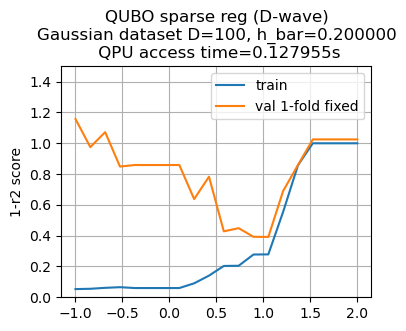

In [135]:


scores_train = []
scores_val = []
plot_y = np.zeros(n_alphas)

for i in range(len(alphas)):
    print(i)
    print("alpha= %f"%alphas[i])

    #mw = custom_algo(X,y,alphas[i],gamma)
    #mw = qubo_bsc(X=X,y=y,alpha=alphas[i],h_bar=h_bar)
    
    D = X.shape[1]
    w = np.ones(D)*h_bar
    m = computation.samples[0][i*D:(i+1)*D]
    mw = m*w
    
    #lasso = Lasso(alpha=alphas[i],fit_intercept=False,random_state=0, max_iter=10000)
    #lasso.fit(X, y)
    #mw = lasso.coef_
    
    y_train_pred = np.matmul(X,mw)*y_std+y_mean
    y_val_pred = np.matmul((X_val-X_mean)/X_std,mw)*y_std+y_mean
    SSres_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    SSres_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

    SStot_train = np.dot(y_mean-y_train,y_mean-y_train)
    SStot_val = np.dot(np.mean(y_val)-y_val,np.mean(y_val)-y_val)

    r2_train = 1-SSres_train/SStot_train
    r2_val = 1-SSres_val/SStot_val
    
    one_norm = np.matmul(np.abs(mw),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(mw)>0,1,0),np.ones(D))
    #print(zero_norm)
    
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #plot_y.append(zero_norm)
    plot_y[i] = zero_norm
    #print(plot_y)
    
    print("m*w= %s"%(str(mw)))
    print(y_train_pred)
    print("r2_train= %f"%r2_train)
    print("r2_val= %f"%r2_val)
    print("sqloss_val= %f"%SSres_val)
    print("one_norm= %f"%one_norm)
    print("zero_norm= %f"%zero_norm)
    print("\n")

fig2 = plt.figure(figsize=(4,3))
ax2 = fig2.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
ax2.plot(np.log10(alphas),1-np.array(scores_train),label="train")
ax2.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
#ax2.plot(np.log10(alphas),plot_y)
title_text = "QUBO sparse reg (D-wave)\nGaussian dataset D=100, h_bar=%f"%h_bar
title_text += "\n QPU access time=%fs"%(computation.sampleset.info["qpu_access_time"]/1e6)
ax2.set_title(title_text)
#ax2.set_xlabel("log10(alpha)")
ax2.set_ylabel("1-r2 score")
#ax2.set_ylabel("|w|_0 zero norm")
ax2.set_ylim(0.0,1.5)
ax2.grid()
ax2.legend()
fig2.savefig('lasso_f2.png')

In [ ]:
h_bar = 0.1
hardware = "classical"
#hardware = "dwave"

alphas = np.logspace(-1, 2, 10)
#alphas = np.array([15.0])
#alphas = np.logspace(-3, 0, 15)

scores_train = []
scores_val = []
plot_y = np.zeros(30)

for i in range(len(alphas)):
    print(i)
    print("alpha= %f"%alphas[i])

    #mw = custom_algo(X,y,alphas[i],gamma)
    mw = qubo_bsc(X=X,y=y,alpha=alphas[i],h_bar=h_bar,hardware=hardware)
    
    #lasso = Lasso(alpha=alphas[i],fit_intercept=False,random_state=0, max_iter=10000)
    #lasso.fit(X, y)
    #mw = lasso.coef_
    
    y_train_pred = np.matmul(X,mw)*y_std+y_mean
    y_val_pred = np.matmul((X_val-X_mean)/X_std,mw)*y_std+y_mean
    SSres_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    SSres_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)

    SStot_train = np.dot(y_mean-y_train,y_mean-y_train)
    SStot_val = np.dot(np.mean(y_val)-y_val,np.mean(y_val)-y_val)

    r2_train = 1-SSres_train/SStot_train
    r2_val = 1-SSres_val/SStot_val
    
    one_norm = np.matmul(np.abs(mw),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(mw)>0,1,0),np.ones(D))
    #print(zero_norm)
    
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #plot_y.append(zero_norm)
    plot_y[i] = zero_norm
    #print(plot_y)
    
    print("m*w= %s"%(str(mw)))
    print(y_train_pred)
    print("r2_train= %f"%r2_train)
    print("r2_val= %f"%r2_val)
    print("sqloss_val= %f"%SSres_val)
    print("one_norm= %f"%one_norm)
    print("zero_norm= %f"%zero_norm)
    print("\n")

fig2 = plt.figure(figsize=(4,3))
ax2 = fig2.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
ax2.plot(np.log10(alphas),1-np.array(scores_train),label="train")
ax2.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
#ax2.plot(np.log10(alphas),plot_y)
title_text = "QUBO sparse reg\nGaussian dataset D=100, h_bar=%f"%h_bar
ax2.set_title(title_text)
#ax2.set_xlabel("log10(alpha)")
ax2.set_ylabel("1-r2 score")
#ax2.set_ylabel("|w|_0 zero norm")
ax2.set_ylim(0.0,1.5)
ax2.grid()
ax2.legend()
fig2.savefig('lasso_f2.png')

In [14]:
X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)

D = X.shape[1]

X_train = X[:150]
y_train = y[:150]
X_val = X[150:200]
y_val = y[150:200]


(442, 10)


In [24]:
np.random.seed(42)

N_train = 360
N_train_folds = 10
N_val = 720
N = N_train+N_val

D = 200
D_small = 20
mu, sigma = 0, 1.0

X_all = np.random.normal(mu, sigma, size=(N,D))
X_small = np.random.normal(mu, sigma, size=(N,D_small))
w_opt = np.random.normal(mu,sigma,size=D_small)
y_all = np.matmul(X_small,w_opt)

X_all[:,:D_small] = X_small
X_train = X_all[:N_train]
X_val = X_all[N_train:N_train+N_val]

y_train = y_all[:N_train]
y_val = y_all[N_train:N_train+N_val]

In [25]:
#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-5, 0, 50)

scores_train = []
scores_val = []

for i in range(len(alphas)):
    print(i)
    lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_train_pred = np.matmul(X_train,lasso.coef_)
    y_val_pred = np.matmul(X_val,lasso.coef_)
    r2_train = lasso.score(X_train,y_train)
    r2_val = lasso.score(X_val,y_val)
    sqloss_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    sqloss_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)
    
    one_norm = np.matmul(np.abs(lasso.coef_),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(lasso.coef_)>0,1,0),np.ones(D))
    
    #scores.append(r2_val)
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #scores_train.append(sqloss_train)
    #scores_val.append(sqloss_val)
    
    print(lasso.coef_)
    print(r2_val)
    print(one_norm)
    print(zero_norm)
    print("\n")

0
[ 1.81840847e+00  3.92078417e-01 -3.40712410e-01  7.92916341e-01
  7.76751108e-01  2.03346155e-01  1.65660377e+00 -8.93797313e-01
 -3.65350804e-01 -5.81562373e-02  9.08286004e-01 -1.05718773e-02
 -1.34260880e+00 -6.85389631e-01  9.99084073e-01  9.69932481e-01
 -1.18409289e+00 -3.52807736e-01 -5.75859602e-01  5.50477397e-01
  1.10691621e-04 -1.76374690e-04  1.33414665e-04 -0.00000000e+00
 -2.13657607e-04 -2.20616455e-04  8.16392069e-05 -0.00000000e+00
  0.00000000e+00 -2.71709202e-04  8.07470861e-05  6.49372899e-06
 -3.80702472e-04  1.82187802e-04 -1.86112468e-04 -1.46599041e-04
 -3.84754640e-04 -2.54125278e-04  1.46344428e-04 -3.55899290e-04
 -2.48248514e-04  1.97200602e-05  1.06141457e-04  5.12876235e-05
 -3.77035216e-04  1.08892175e-04 -2.38705773e-05  1.30853907e-05
  2.36907581e-04  2.84899584e-04 -3.42386279e-04 -2.29214415e-05
  4.71803540e-05  1.81616131e-04  0.00000000e+00  1.48719573e-05
 -1.20298443e-04 -4.75072246e-05 -3.66797872e-04 -2.83654949e-05
 -1.11512332e-05 -2.962

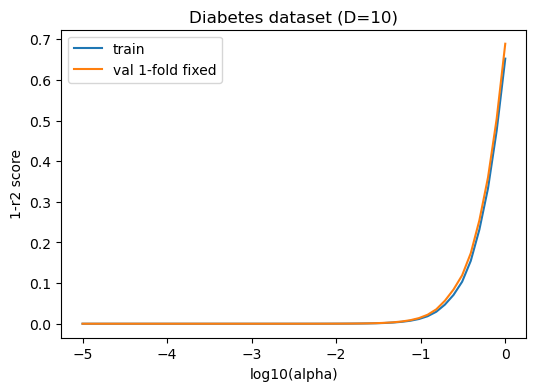

In [26]:
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
ax1.plot(np.log10(alphas),1-np.array(scores_train),label="train")
ax1.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
ax1.set_title("Diabetes dataset (D=10)")
ax1.set_xlabel("log10(alpha)")
ax1.set_ylabel("1-r2 score")
ax1.legend()
plt.show()

In [23]:
#alphas = np.logspace(-100, 2, 30)
alphas = np.logspace(-5, 2, 50)

scores_train = []
scores_val = []

for i in range(len(alphas)):
    print(i)
    #lasso = Lasso(alpha=alphas[i],random_state=0, max_iter=10000)
    #lasso.fit(X_train, y_train)
    w = qubo_bsc(X=X_train,y=y_train,alpha=alphas[i],h_bar=10)
    y_train_pred = np.matmul(X_train,w)
    y_val_pred = np.matmul(X_val,w)
    r2_train = lasso.score(X_train,y_train)
    r2_val = lasso.score(X_val,y_val)
    sqloss_train = np.dot(y_train_pred-y_train,y_train_pred-y_train)
    sqloss_val = np.dot(y_val_pred-y_val,y_val_pred-y_val)
    
    one_norm = np.matmul(np.abs(w),np.ones(D))
    zero_norm = np.matmul(np.where(np.abs(w)>0,1,0),np.ones(D))
    
    #scores.append(r2_val)
    scores_train.append(r2_train)
    scores_val.append(r2_val)
    #scores_train.append(sqloss_train)
    #scores_val.append(sqloss_val)
    
    print(w)
    print(r2_val)
    print(one_norm)
    print(zero_norm)
    print("\n")

0
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


1
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


2
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


3
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


4
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


5
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


6
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


7
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


8
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


9
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


10
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


11
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


12
[ 0.  0. 10. 10.  0.  0.  0. 10. 10. 10.]
0.31600488016675665
50.0
5.0


13
[ 0.  0. 10. 10.  0

In [ ]:
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(111)

#plt.rcParams['figure.figsize'] = [8, 5]
ax1.plot(np.log10(alphas),1-np.array(scores_train),label="train")
ax1.plot(np.log10(alphas),1-np.array(scores_val),label="val 1-fold fixed")
ax1.set_title("Diabetes dataset (D=10)")
ax1.set_xlabel("log10(alpha)")
ax1.set_ylabel("1-r2 score")
ax1.legend()
plt.show()

In [12]:
#import matplotlib.image as mpimg
from skimage.io import imread,imsave


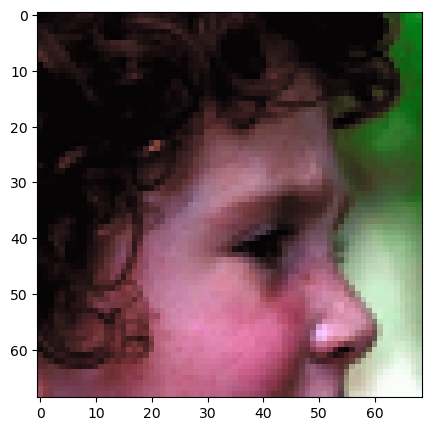

In [13]:
img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/val_lr/000005.png'

img_lr = imread(img_path)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img_lr)

plt.show()

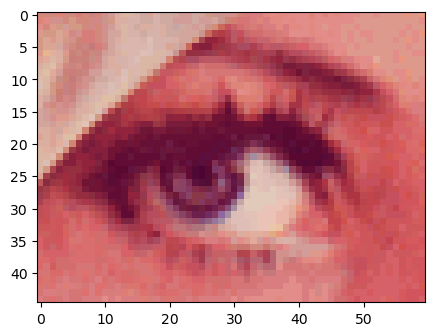

In [59]:
img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/val_hr/000008.png'
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/data/Set5/HR/000000.png'

img_hr = imread(img_path)
img_hr = img_hr[240:285,240:300,:]
#img_hr = img_hr[240:290,300:360,:]
#img_hr = img_hr[160:240,295:395,:]

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img_hr)

plt.show()

In [60]:
imsave('/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/val_single_small2_hr/000008.png',img_hr)

In [61]:
img_hr.shape

(45, 60, 3)